# Visualizing a Julia Set dependence on the c parameter

In [1]:
import os
while 'notebooks' in os.getcwd():
    os.chdir('..')

In [2]:
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

from src.julia_set_cython import calculate_julia_set

/home/przemyslaw/projects/shared-venv/lib/python3.11/site-packages/numpy/_core/getlimits.py:551: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)


In [3]:
c_real = [0.1*i for i in range(-10, 11, 2)]
c_im = [0.1*i for i in range(10, -11, -2)]

In [4]:
julia_sets = list()
for im in tqdm(c_im):
    row = []
    for re in c_real:
        julia_set = calculate_julia_set(max_iter=300, width=1000, c=complex(re, im))
        row.append(julia_set)
    julia_sets.append(row)

100%|███████████████████████████████████████████████████████| 11/11 [00:40<00:00,  3.68s/it]


100%|███████████████████████████████████████████████████████| 11/11 [00:05<00:00,  2.11it/s]


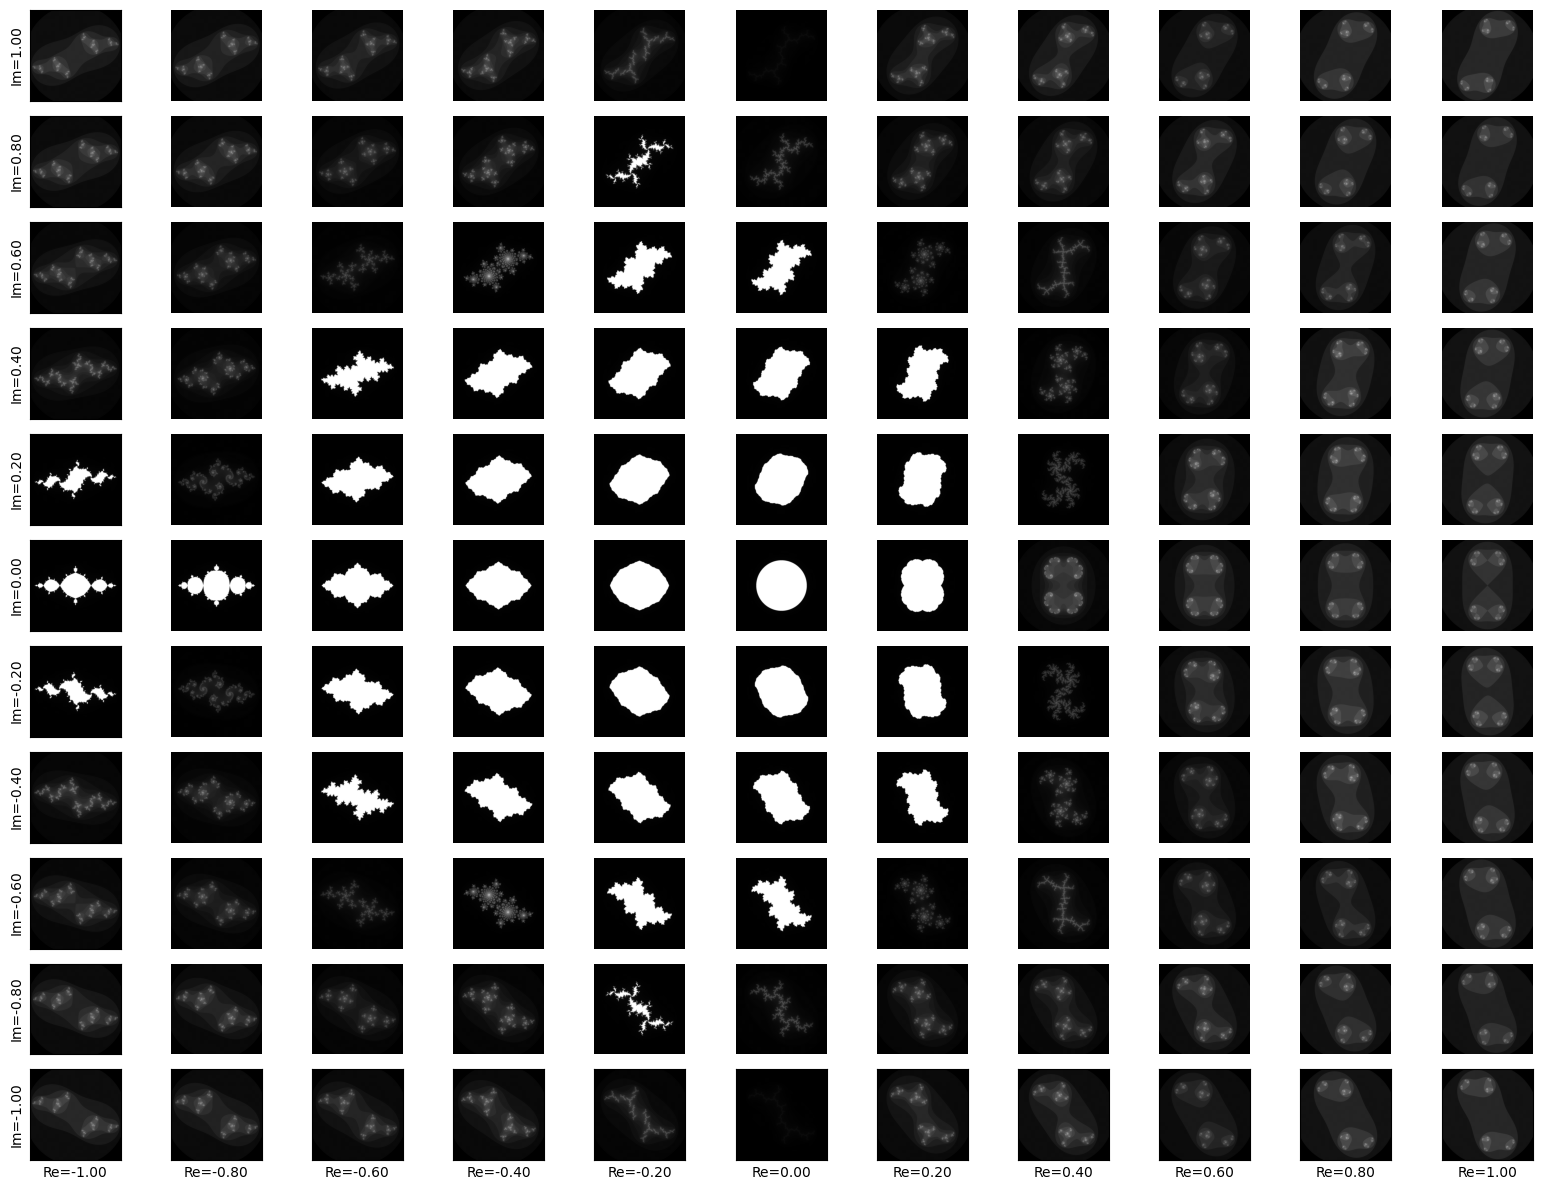

In [5]:
fig, axes = plt.subplots(len(c_im), len(c_real), figsize=(16, 12))
for i in trange(len(c_im)):
    for j in range(len(c_real)):
        ax = axes[i, j]
        ax.imshow(julia_sets[i][j], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        if i == len(c_im) - 1 or j == 0:
            if i == len(c_im) - 1:
                ax.set_xlabel(f"Re={c_real[j]:.2f}")
            if j == 0:
                ax.set_ylabel(f"Im={c_im[i]:.2f}")
        else:
            ax.set_axis_off()
fig.tight_layout()
fig.savefig('img/julia_set_grid.png')